# Bài 1: Sử dụng FFT để lọc ảnh 

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from math import *
from typing import List, Dict, Tuple
from numpy._typing import *

# Fourier transform

In [2]:
def exp2cosine(x: ArrayLike) -> ArrayLike:
    '''convert e^jx -> cos(x) + j*sin(x) '''
    return np.cos(x) + 1j*np.sin(x) 

In [3]:
def fft2D(img: ArrayLike) -> ArrayLike:
    ft = np.zeros_like(img, dtype = np.complex64)
    T_img = img.T
    M, N= T_img.shape[:2]
    x = u = np.arange(M)
    y = np.arange(N)
    for v in range(img.shape[0]):
        s = T_img*exp2cosine(
            -2*pi*(
                np.expand_dims(
                    u[:, None]*x[None,:],
                    axis = -1    
                ) * 1.0/M + v*y[None,:]*1.0/N
            )
        )
        ft[v,:] = np.sum(
            s, axis = (-1,-2)
        )*1.0/(M*N)
            
    return ft

# Inverse fourier transform

In [4]:
def ifft2D(img: ArrayLike) -> ArrayLike:
    ft = np.zeros_like(img, dtype = np.complex64)
    T_img = img.T
    M, N= T_img.shape[:2]
    x = u = np.arange(M)
    y = np.arange(N)
    for v in range(img.shape[0]):
        s = T_img*exp2cosine(
            2*pi*(
                np.expand_dims(
                    u[:, None]*x[None,:],
                    axis = -1    
                ) * 1.0/M + v*y[None,:]*1.0/N
            )
        )
        ft[v,:] = np.sum(
            s, axis = (-1, -2)
        )
            
    return ft

# Đọc Ảnh đầu vào

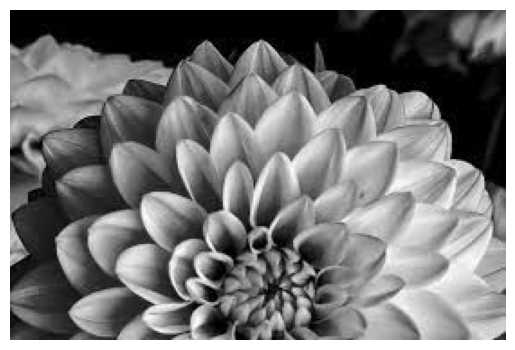

In [5]:
img = cv.imread('test.jpg', 0)

plt.axis('off')
plt.imshow(img, 'gray')

# Tính Fourier Transform và Inverse Fourier Transform bằng code

C:\Users\PC\AppData\Local\Temp\ipykernel_24824\1633845672.py:23: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


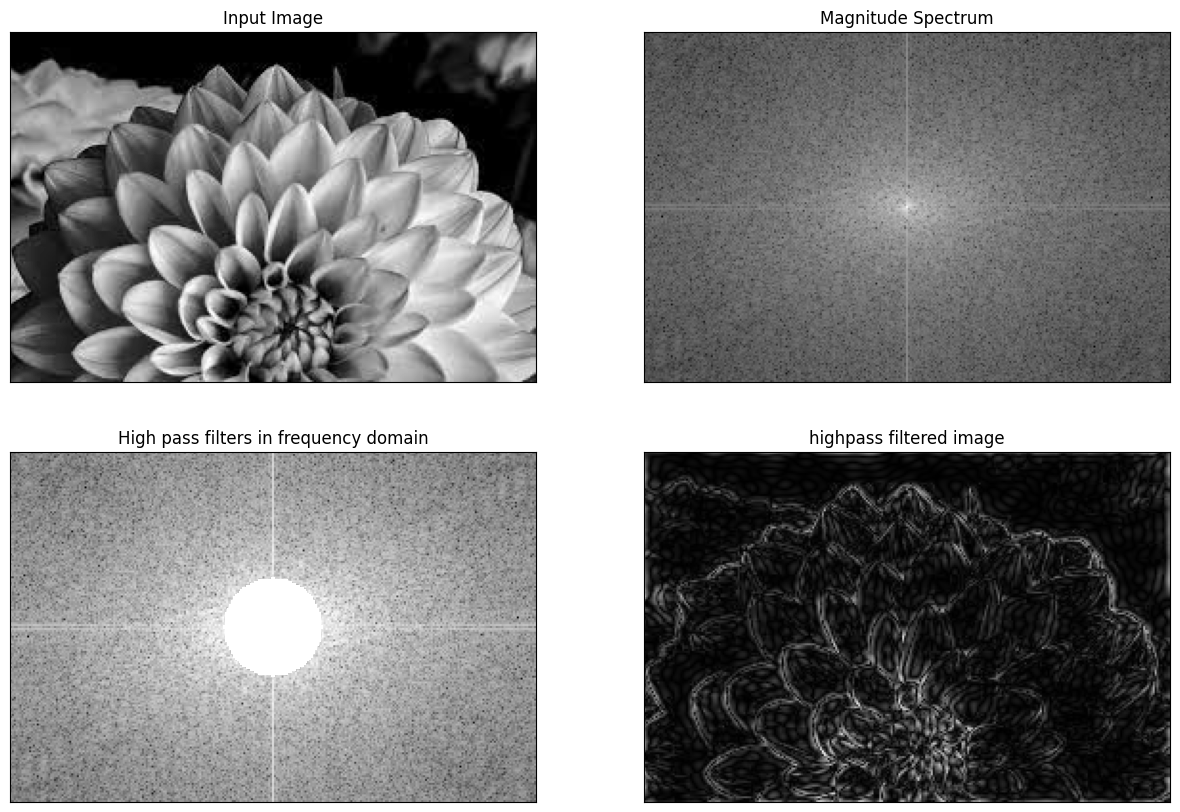

In [6]:
### Sử dụng code ở trên ###

fft_code = fft2D(img)
fshift = np.fft.fftshift(fft_code)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

M, N = img.shape
center = M//2, N//2
R = 25
x, y = np.ogrid[:M, :N]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= R**2
fshift[mask_area] = 0
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(223)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('High pass filters in frequency domain')
plt.xticks([]), plt.yticks([])

ifshift = np.fft.ifftshift(fshift)
ifft_code = ifft2D(ifshift)
ifft_img = np.abs(ifft_code)
plt.subplot(224)
plt.imshow(ifft_img, cmap = 'gray')
plt.title('highpass filtered image')
plt.xticks([]), plt.yticks([])

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_24824\3170280516.py:24: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


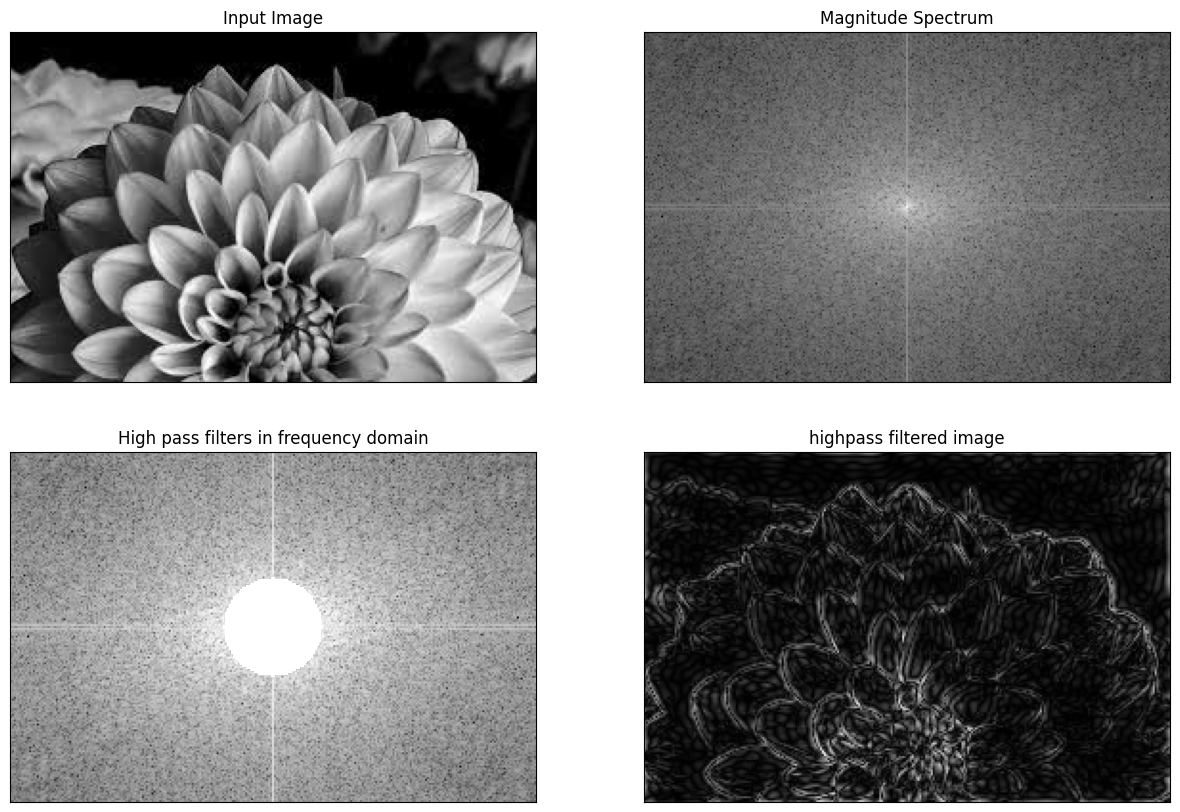

In [7]:
### Sử dụng thư viện numpy ###

fft_np = np.fft.fft2(img)
fshift = np.fft.fftshift(fft_np)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

M, N = img.shape
center = M//2, N//2
R = 25
x, y = np.ogrid[:M, :N]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= R**2
fshift[mask_area] = 0
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(223)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('High pass filters in frequency domain')
plt.xticks([]), plt.yticks([])

ifft_shift = np.fft.ifftshift(fshift)
ifft = np.fft.ifft2(ifft_shift)
plt.subplot(224)
plt.imshow(np.abs(ifft), cmap = 'gray')
plt.title('highpass filtered image')
plt.xticks([]), plt.yticks([])
plt.show()